In [1]:
whos

Interactive namespace is empty.


## filename

In [1]:
filenameOutput = 'stock_test_data_20171020.csv'
filenameTrain = 'stock_train_data_20171020.csv'

In [20]:
string = '1,0.9596920982404612,-0.08572142055232967,-0.3447072908187547,1.367433205088529,-0.5243361982987504,1.4104963389177407,-0.8829508057309632,-0.24141174986267305,0.6322454294838192,-0.9721723716374191,-0.2942925654400895,1.0310717194552796,0.17455809229807495,0.8564260393338632,1.8175627055866748,-2.0266451104721246,0.8074082443000765,0.7948665535249578,2.5469609566070766,-0.2246606904584466,1.1587534797459573,0.16722344209649612,0.047880277955910676,-0.6396200743648839,-0.3404202967366431,0.3375008931461109,1.1371491727084726,-1.1270322472852772,-0.6341128539159994,-0.008580479981893943,0.006082702796517471,-0.19947558915883287,0.7063402067609639,-0.49029841991003525,0.7166516173327272,0.32801922894834307,2.7876703012483612,0.32357420237709705,0.027980043504850345,-0.23390862449378666,-0.049452086183390837,-1.5972171418379513,0.7413841769152024,1.2100430251624765,0.4854013200882743,0.863179211734677,0.7444977867619214,0.4374920206373349,0.7336070772373077,-0.5104382022770168,0.5349505657321171,1.505775821184698,0.8474240042136407,-0.5280528934598955,1.0972832497770493,0.6349768540333425,-0.5589575216707132,-0.15615618076079227,-0.3230526197870713,-0.3315144821523461,-0.7618750443188514,1.2984023911185052,1.0992114722786168,-0.5287813284829191,-0.13561576624649666,-0.02074997840589047,-0.4523327826331798,0.7106537808977452,0.040609158825366955,1.1958494670190176,-0.12484366791179959,-1.0713293088926004,1.7485411200781387,0.10314888875127383,-0.19824477561261353,0.5402706548904853,0.5544268990972975,,-0.2120128022855892,0.7584103917489629,0.623868763343888,0.6421887548221487,-1.0802692134412417,0.1983346659443214,0.008269796974921629,0.10895678757355043,0.8006146757103498,-0.6527558377125267,6.0,0.0,5,1'

In [21]:
val = 0
for i in string:
    if i == ',':
        val = val + 1
print(val)

92


In [18]:
fp = open('stock_train_data_20170929.csv')
for i, line in enumerate(fp):
    print(line)
    if i==2: break

id,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39,feature40,feature41,feature42,feature43,feature44,feature45,feature46,feature47,feature48,feature49,feature50,feature51,feature52,feature53,feature54,feature55,feature56,feature57,feature58,feature59,feature60,feature61,feature62,feature63,feature64,feature65,feature66,feature67,feature68,feature69,feature70,feature71,feature72,feature73,feature74,feature75,feature76,feature77,feature78,feature79,feature80,feature81,feature82,feature83,feature84,feature85,feature86,feature87,weight,label,group,era

0,-0.28989745446519016,-0.01949648499661614,0.46362524569267427,0.3523901435397557,-1.6159437490221042,


# import lib

In [12]:
# import chardet
# import pandas as pd

# with open(filenameTrain, 'rb') as f:
#     result = chardet.detect(f.read())  # or readline if the file is large

In [2]:
import pickle 
import math

import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops

from matplotlib import pyplot as plt
import pandas as pd
# import sklearn as sk
# from sklearn.model_selection import train_test_split

from tensorflow.python.framework import ops
from mpl_toolkits.mplot3d import Axes3D

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
%matplotlib inline 

# load data

In [6]:
trainDf_raw = pd.read_csv(filenameTrain)

In [8]:
outputDf_raw = pd.read_csv(filenameOutput)

In [9]:
trainDf_raw = trainDf_raw.drop('feature82', axis = 1)

In [10]:
outputDf_raw = outputDf_raw.drop('feature82', axis = 1)

In [11]:
outputDf_raw.head(10)

,id,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,feature78,feature79,feature80,feature81,feature83,feature84,feature85,feature86,feature87,group
0,280520,-0.113162,0.291272,-0.056903,0.672506,-0.064051,0.074646,-0.182824,-1.567206,1.054374,...,-0.870373,-0.024849,-0.915472,-0.698111,1.214149,0.186791,0.070914,0.525518,-0.545199,16
1,280521,-0.482062,-0.821322,-0.402431,-0.862481,-0.005479,0.091999,-0.558161,1.165437,-1.207913,...,-0.522433,-0.503523,0.792745,-0.522372,-1.443222,-0.739767,-0.147039,-0.186802,-0.366352,7
2,280522,-0.025525,-0.194799,-0.069863,-1.488261,-0.205954,-0.051684,0.937648,1.026741,1.347052,...,-0.390391,-0.810516,-0.958342,-0.534261,-1.442745,0.392148,0.131538,3.120955,-0.521213,22
3,280523,-1.369025,0.874309,-0.566607,-1.164911,-0.318168,-0.145167,0.822707,0.391315,1.490259,...,-0.701902,-0.618140,-1.186510,0.288428,0.851604,-0.034264,-0.314956,-0.457581,0.418319,24
4,280524,0.012928,0.426029,-0.013586,-0.482758,-0.388818,0.052343,1.188754,-1.059296,-0.913371,...,0.609804,0.034983,-0.308197,0.926041,0.048011,-0.380837,-0.156864,-0.251705,0.312432,12
5,280525,0.013477,2.181014,0.118571,-1.179410,0.168358,-0.189281,1.768872,-0.272789,-0.621192,...,-0.243556,0.218176,0.237623,-0.224012,0.239086,0.737932,-0.174982,-0.072758,0.438584,21
6,280526,-0.132358,-0.306988,-0.354206,-1.154173,0.287780,-0.129136,-0.385155,0.939598,-0.768779,...,-0.970773,-0.386470,0.645777,-0.585949,0.238688,0.383921,-0.277866,-0.402270,-0.564900,7
7,280527,0.011425,0.375541,-0.047068,0.532734,-0.158942,-0.189414,-0.070651,-1.140946,-1.060690,...,-0.753976,-0.010901,-0.017363,-0.621310,0.189966,0.634643,0.402684,0.210562,-0.867959,11
8,280528,-0.991131,-0.311526,-0.530519,0.499297,-0.438004,0.026128,-0.730226,1.202350,-0.185297,...,-0.658746,-0.682023,-0.495429,0.477361,-0.496924,-0.412588,-0.581450,-0.255528,0.071210,1
9,280529,0.025417,0.169297,-0.514934,0.097846,-0.199558,-0.152387,-0.112141,-1.456799,0.689303,...,-0.547813,-0.347025,-0.169474,-0.608037,-0.515943,0.736092,-0.271834,0.041480,-0.347706,16


In [12]:
np.mean(trainDf_raw)

id           140259.500000
feature0         -0.011298
feature1          0.069765
feature2          0.034207
feature3         -0.023513
feature4         -0.174484
feature5         -0.012001
feature6         -0.112609
feature7          0.044165
feature8          0.028302
feature9         -0.167563
feature10        -0.098131
feature11        -0.078451
feature12         0.025717
feature13         0.077915
feature14         0.104561
feature15         0.044424
feature16        -0.002533
feature17        -0.042136
feature18        -0.096880
feature19        -0.004363
feature20        -0.222318
feature21         0.011385
feature22        -0.009920
feature23         0.127192
feature24        -0.128933
feature25        -0.046754
feature26        -0.090811
feature27        -0.017480
feature28        -0.000737
                 ...      
feature61         0.023894
feature62         0.009429
feature63        -0.201141
feature64        -0.121430
feature65        -0.034792
feature66        -0.025149
f

In [13]:
np.std(trainDf_raw)

id           80979.148756
feature0         0.765198
feature1         0.887176
feature2         0.940708
feature3         1.000045
feature4         0.664556
feature5         0.456158
feature6         0.626508
feature7         1.012172
feature8         1.018684
feature9         0.550645
feature10        0.812312
feature11        0.856387
feature12        0.995179
feature13        0.850926
feature14        0.836835
feature15        0.863150
feature16        1.008087
feature17        0.785743
feature18        0.635763
feature19        0.932199
feature20        0.490829
feature21        0.849121
feature22        0.468420
feature23        0.856026
feature24        0.947290
feature25        0.730237
feature26        0.532633
feature27        1.003531
feature28        0.959655
                 ...     
feature61        0.998146
feature62        0.815175
feature63        0.515496
feature64        0.762199
feature65        0.900320
feature66        0.485071
feature67        0.716033
feature68   

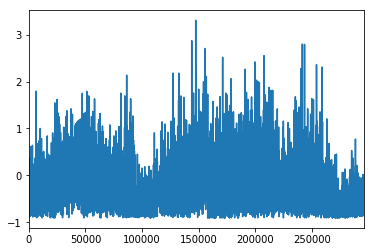

In [32]:
trainDf_raw[trainDf_raw.group == 1].feature0.plot()

In [33]:
np.mean(trainDf_raw[trainDf_raw.group == 1].feature0)

-0.27503853692180202

In [34]:
np.mean(trainDf_raw[trainDf_raw.group == 2].feature0)

-0.27865365102613582

Text(0.5,1,'std of data')

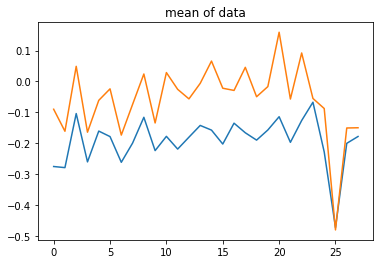

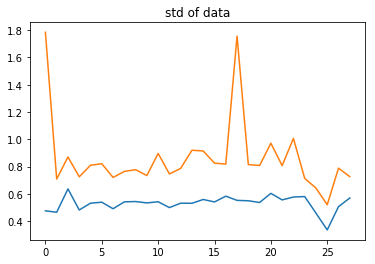

In [39]:
lis_train = []
lis_output = []
for i in range(1, 29):
    lis_train.append(np.mean(trainDf_raw[trainDf_raw.group == i].feature0))
    lis_output.append(np.mean(outputDf_raw[outputDf_raw.group == i].feature0))
plt.figure()
plt.plot(lis_train)
plt.plot(lis_output)
plt.title('mean of data')

lis_train = []
lis_output = []
for i in range(1, 29):
    lis_train.append(np.std(trainDf_raw[trainDf_raw.group == i].feature0))
    lis_output.append(np.std(outputDf_raw[outputDf_raw.group == i].feature0))
plt.figure()
plt.plot(lis_train)
plt.plot(lis_output)
plt.title('std of data')

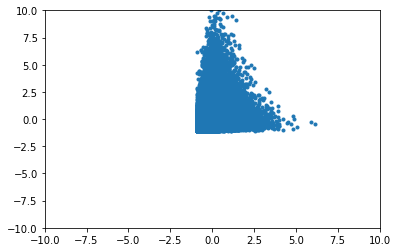

In [21]:
plt.plot(trainDf_raw.iloc[:,1], trainDf_raw.iloc[:,10], '.')
plt.xlim((-10, 10))
plt.ylim((-10, 10))
plt.show()

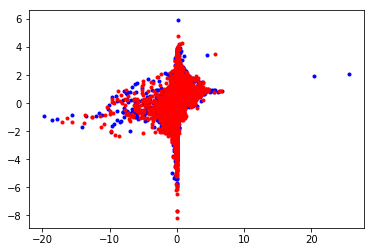

In [32]:
t = 39
y = 50
plt.figure()
plt.plot(trainDf_raw[trainDf_raw.label==0.0].iloc[:,t], trainDf_raw[trainDf_raw.label==0.0].iloc[:,y], 'b.')
plt.plot(trainDf_raw[trainDf_raw.label==1.0].iloc[:,t], trainDf_raw[trainDf_raw.label==1.0].iloc[:,y], 'r.')
# plt.figure()

plt.show()

In [8]:
test = trainDf_raw[trainDf_raw.columns[1:89]]

In [25]:
label = trainDf_raw.label.as_matrix()

In [29]:
label = label.reshape(-1, 1)

In [107]:
test.shape

(296104, 88)

In [13]:
def pca2(x_tmp, k):
    m, n = np.shape(x_tmp)
    x = tf.placeholder(dtype='float32', shape = (m, n))
    s, u, _ = tf.svd(tf.matmul(tf.transpose(x),x)/m)
    with tf.Session() as sess:
        s_out, output = sess.run([s, u], feed_dict = {x : x_tmp})
    print(np.sum(s_out[0:k]) / np.sum(s_out))
    return output[:, 0:k]

In [108]:
u =  pca2(test, k = 1)

0.304536


In [109]:
x = np.dot(u.T, test.T)

In [110]:
x = x.T

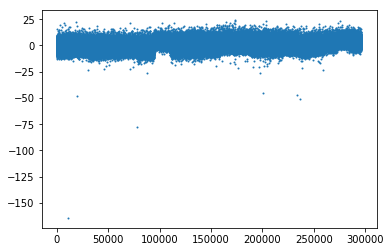

In [111]:
plt.plot(x, '.', markersize = 2)

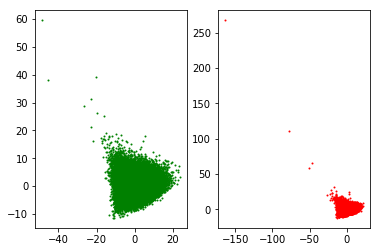

In [49]:
plt.subplot(121)
plt.plot(x[np.squeeze(label == 0), :][:, 0], x[np.squeeze(label == 0), :][:, 1], 'g.', markersize = 2)
plt.subplot(122)
plt.plot(x[np.squeeze(label == 1), :][:, 0], x[np.squeeze(label == 1), :][:, 1], 'r.', markersize = 2)

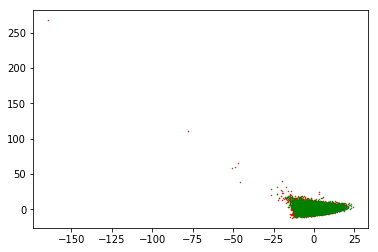

In [66]:
plt.plot(x[np.squeeze(label == 1), :][:, 0], x[np.squeeze(label == 1), :][:, 1], 'r.', markersize = 1)
plt.plot(x[np.squeeze(label == 0), :][:, 0], x[np.squeeze(label == 0), :][:, 1], 'g.', markersize = 1)

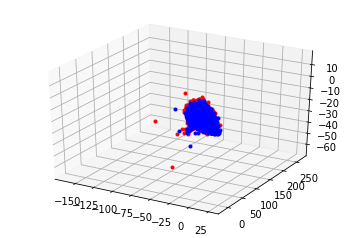

In [67]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(x[np.squeeze(label == 1), :][:,0], x[np.squeeze(label == 1), :][:, 1], x[np.squeeze(label == 1), :][:,2], 'r.')
ax.plot3D(x[np.squeeze(label == 0), :][:,0], x[np.squeeze(label == 0), :][:, 1], x[np.squeeze(label == 0), :][:,2], 'b.')

In [63]:
plt.savefig('test')

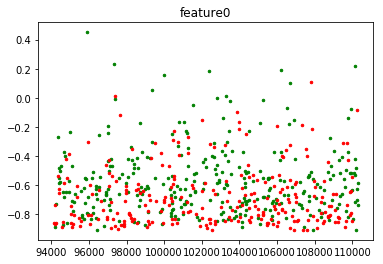

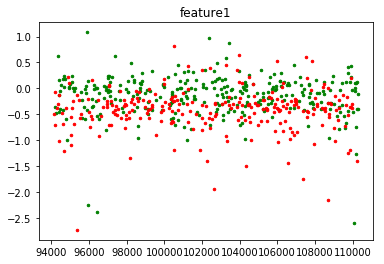

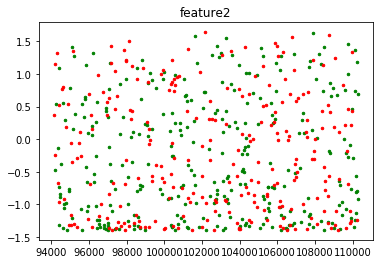

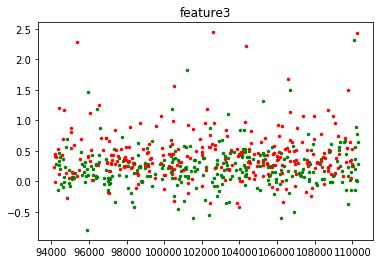

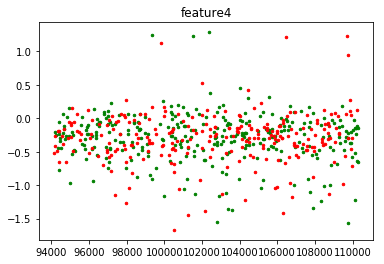

In [45]:
era = 7
for i in range(0, 5):
    plt.figure()

    plt.plot(trainDf_raw['feature'+str(i)][trainDf_raw.era==era][trainDf_raw.group==1][trainDf_raw.label==1.0], 'g.', markersize = 5)
    plt.plot(trainDf_raw['feature'+str(i)][trainDf_raw.era==era][trainDf_raw.group==1][trainDf_raw.label==0.0], 'r.', markersize = 5)


#     plt.xlim((90000,100000))
    plt.title('feature'+str(i))

    plt.show()

In [7]:
'feature'+str(0)

'feature0'

In [53]:
a = np.zeros((10,3))
a[a[:,1]>=0,1] = 1

In [64]:
c = list()

In [15]:
trainDf_use = trainDf_raw
# trainDf_use = trainDf_raw[trainDf_raw.group == 1]

In [16]:
trainDf_use.shape

(280520, 92)

In [40]:
trainDf_raw.mean()

id           140259.500000
feature0          0.130940
feature1          0.026627
feature2         -0.025123
feature3         -0.102391
feature4         -0.129235
feature5          0.078731
feature6         -0.016514
feature7          0.014926
feature8          0.016265
feature9          0.071076
feature10         0.043943
feature11         0.000054
feature12         0.055597
feature13        -0.024024
feature14         0.105937
feature15         0.034215
feature16        -0.228300
feature17        -0.264132
feature18         0.136475
feature19        -0.018926
feature20        -0.077966
feature21        -0.011904
feature22         0.032304
feature23         0.108123
feature24         0.093360
feature25        -0.041991
feature26         0.199863
feature27         0.021415
feature28         0.010346
                 ...      
feature62        -0.004085
feature63        -0.042489
feature64         0.014948
feature65         0.064880
feature66        -0.008787
feature67        -0.014760
f

In [63]:
outputDf_raw.head(10)

,id,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,feature79,feature80,feature81,feature82,feature83,feature84,feature85,feature86,feature87,group
0,280520,-0.349508,-1.044457,-0.150194,0.071726,-0.385615,-0.170151,-0.589743,-0.539105,0.046754,...,-0.372560,-0.075400,-0.556568,-0.500773,0.264582,-0.087861,-0.124041,0.541620,-0.562966,6
1,280521,0.014507,-1.120819,-0.434453,0.217809,-0.120065,0.482298,-1.326111,0.034404,-0.107229,...,0.885804,2.441680,2.293656,-0.448512,1.303111,-0.788185,-0.458307,1.629776,-0.418327,14
2,280522,0.764321,-0.924883,-0.172636,-0.759505,-0.751512,0.490089,-0.353144,-0.643302,0.034398,...,-0.283613,-0.193283,-0.836733,-0.185977,0.539441,0.235659,-0.241512,-0.465341,0.051297,15
3,280523,-0.397751,2.545291,0.477857,-0.481891,0.476800,-0.215818,0.554050,0.345644,0.094980,...,0.053082,-0.606310,0.258300,-0.088670,-0.331259,-0.291277,-1.058886,-0.443194,0.180930,6
4,280524,0.621293,-0.384080,-0.099100,-0.826485,-0.481112,0.452202,0.101549,-0.054900,0.058320,...,-0.105050,-0.423526,-0.612224,1.959117,-0.380533,0.619981,-0.047162,-0.282127,0.518788,18
5,280525,0.427628,0.008135,-0.391024,-0.969773,-0.490863,0.313419,-0.269492,0.277610,0.042808,...,-0.477526,1.009656,-0.553066,0.900553,0.429531,0.153065,0.479496,1.504030,1.481686,22
6,280526,0.977820,-0.445687,-0.135039,-0.919085,-0.830930,0.402201,-0.087046,-0.740656,0.053048,...,-0.321457,0.243137,-0.774894,-0.327644,0.513729,0.547497,1.386216,-0.173348,-0.049012,3
7,280527,0.181256,-0.983028,-0.885078,-0.023478,-0.512527,-0.224046,-0.099498,-1.045053,-0.051227,...,-0.989753,0.443844,-0.228570,-0.851380,0.506693,-0.559521,-0.076545,-0.041109,-0.893252,7
8,280528,-1.499209,-0.649941,1.286672,-0.405419,-0.649548,-1.678520,0.261045,-0.529903,0.094283,...,-0.151266,-0.831737,-0.132103,-0.589919,-1.209042,-0.006206,0.993469,-0.425841,-0.612101,12
9,280529,0.632365,-0.303909,-0.152196,-0.522527,-0.339414,0.442724,-0.569329,-0.129039,-0.015654,...,0.249589,0.419301,-0.360392,0.055318,0.620438,0.771816,-1.283595,0.057226,0.996070,8


In [37]:
round(4.6)

5

In [17]:
choice = np.random.permutation(20)

# trainDf = trainDf_use[trainDf_use.era.isin(choice[8:])]
# validDf = trainDf_use[trainDf_use.era.isin(choice[4:8])]
trainDf_tmp = trainDf_use[trainDf_use.era.isin(choice[2:])]
# validDf = trainDf_use[trainDf_use.era.isin(choice[4:8])]
train_size = round(trainDf_tmp.shape[0]*0.8)
choice2 = np.random.permutation(trainDf_tmp.shape[0])
trainDf = trainDf_tmp.iloc[choice2[0:train_size]]
validDf = trainDf_tmp.iloc[choice2[train_size:]]
# del trainDf_tmp

testDf = trainDf_use[trainDf_use.era.isin(choice[0:2])]

assert(testDf.shape[1]==validDf.shape[1]==testDf.shape[1])

print('features size : ')
print('train data size, ',trainDf.shape[0], ' valid data size, ',validDf.shape[0], ' test data size, ', testDf.shape[0])
print('train percent : ',trainDf.shape[0] / (trainDf.shape[0] + validDf.shape[0] + testDf.shape[0]))
print('valid percent : ',validDf.shape[0] / (trainDf.shape[0] + validDf.shape[0] + testDf.shape[0]))
print('test percent : ',testDf.shape[0] / (trainDf.shape[0] + validDf.shape[0] + testDf.shape[0]))

train_w = trainDf.weight.as_matrix().reshape(1, -1)
valid_w = validDf.weight.as_matrix().reshape(1, -1)
test_w = testDf.weight.as_matrix().reshape(1, -1)

train_features = trainDf[trainDf.columns[1:-4]].as_matrix()
train_labels = trainDf[trainDf.columns[-3]].as_matrix()
valid_features = validDf[validDf.columns[1:-4]].as_matrix()
valid_labels = validDf[validDf.columns[-3]].as_matrix()
test_features = testDf[testDf.columns[1:-4]].as_matrix()
test_labels = testDf[testDf.columns[-3]].as_matrix()

# train_features = np.hstack((trainDf[trainDf.columns[1:-4]].as_matrix(), trainDf[trainDf.columns[-2]].as_matrix().reshape(1,-1).T))
# train_labels = trainDf[trainDf.columns[-3]].as_matrix()
# valid_features = np.hstack((validDf[validDf.columns[1:-4]].as_matrix(), validDf[validDf.columns[-2]].as_matrix().reshape(1,-1).T))
# valid_labels = validDf[validDf.columns[-3]].as_matrix()
# test_features = np.hstack((testDf[testDf.columns[1:-4]].as_matrix(), testDf[testDf.columns[-2]].as_matrix().reshape(1,-1).T))
# test_labels = testDf[testDf.columns[-3]].as_matrix()

output_features = outputDf_raw[outputDf_raw.columns[1:-1]].as_matrix()

features size : 
train data size,  192146  valid data size,  48036  test data size,  28615
train percent :  0.7148368471374309
valid percent :  0.1787073516445496
test percent :  0.10645580121801955


In [18]:
trainDf.shape

(192146, 92)

In [51]:
train_size

603

In [48]:
choice2.shape

(253744,)

In [88]:
test_features.shape

(738, 88)

## normalization

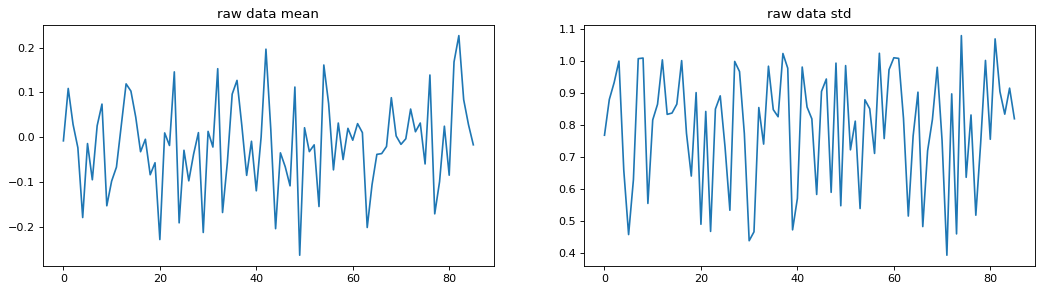

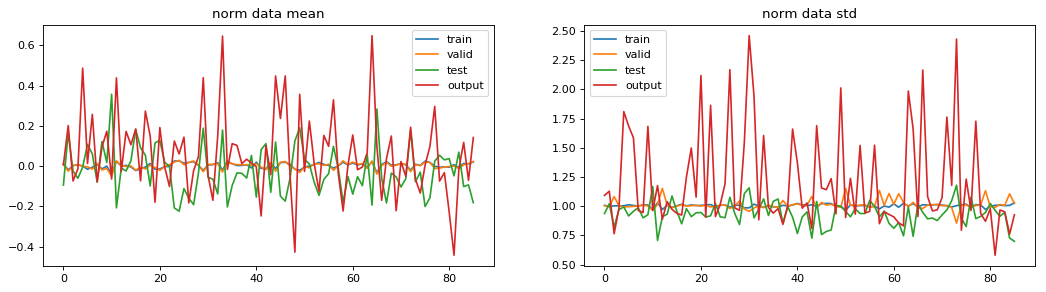

data shape ---------------
train featrues shape :  (87, 192146)  train labels shape (1, 192146)
valid features shape :  (87, 48036)  valid labels shape (1, 48036)
test features shape :  (87, 28615)  test labels shape (1, 28615)


In [19]:
# normalization
train_features_mean = np.mean(np.vstack((train_features, valid_features, test_features)), axis = 0).reshape(1, -1)
train_features_std = np.std(np.vstack((train_features, valid_features, test_features)), axis = 0).reshape(1, -1)

# # normalization
# train_features_mean = np.mean(train_features, axis = 0).reshape(1, -1)
# valid_features_mean = np.mean(valid_features, axis = 0).reshape(1, -1)
# test_features_mean = np.mean(test_features, axis = 0).reshape(1, -1)

# output_features_mean = np.mean(output_features, axis = 0).reshape(1, -1)

# train_features_std = np.std(train_features, axis = 0).reshape(1, -1)
# valid_features_std = np.std(valid_features, axis = 0).reshape(1, -1)
# test_features_std = np.std(test_features, axis = 0).reshape(1, -1)

# output_features_std = np.std(output_features, axis = 0).reshape(1, -1)

plt.figure(figsize=(16, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(121)
plt.plot(train_features_mean[:,0:-1].T)
# plt.plot(valid_features_mean[:,0:-1].T)
# plt.plot(test_features_mean[:,0:-1].T)
# plt.plot(output_features_mean[:,0:-1].T)
# plt.legend(['train', 'valid', 'test', 'output'])
plt.title('raw data mean')

plt.subplot(122)
plt.plot(train_features_std[:,0:-1].T)
# plt.plot(valid_features_std[:,0:-1].T)
# plt.plot(test_features_std[:,0:-1].T)
# plt.plot(output_features_std[:,0:-1].T)
# plt.legend(['train', 'valid', 'test', 'output'])
plt.title('raw data std')

plt.show()

# use train norm mean and std to normolize data in valid and test set.
train_features_norm = (train_features - train_features_mean) / (train_features_std + 1e-8)
valid_features_norm = (valid_features - train_features_mean) / (train_features_std + 1e-8)
test_features_norm = (test_features - train_features_mean) / (train_features_std + 1e-8)
output_features_norm = (output_features - train_features_mean) / (train_features_std + 1e-8)

plt.figure(figsize=(16, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(121)
plt.plot(np.mean(train_features_norm[:,0:-1], axis = 0))
plt.plot(np.mean(valid_features_norm[:,0:-1], axis = 0))
plt.plot(np.mean(test_features_norm[:,0:-1], axis = 0))
plt.plot(np.mean(output_features_norm[:,0:-1], axis = 0))
plt.legend(['train', 'valid', 'test', 'output'])
plt.title('norm data mean')

plt.subplot(122)
plt.plot(np.std(train_features_norm[:,0:-1], axis = 0))
plt.plot(np.std(valid_features_norm[:,0:-1], axis = 0))
plt.plot(np.std(test_features_norm[:,0:-1], axis = 0))
plt.plot(np.std(output_features_norm[:,0:-1], axis = 0))
plt.legend(['train', 'valid', 'test', 'output'])
plt.title('norm data std')

plt.show()

# # random train data
# data_set = np.hstack((train_features_norm, train_labels.reshape(-1,1)))
# data_set = data_set[list(np.random.permutation(data_set.shape[0])), :]
# train_features_norm = data_set[:,0:-1]
# train_labels = data_set[:,-1]

# transpose input data for tensorflow
train_features_norm = train_features_norm.T
valid_features_norm = valid_features_norm.T
test_features_norm = test_features_norm.T
output_features_norm = output_features_norm.T

train_labels = train_labels.reshape(1, -1)
valid_labels = valid_labels.reshape(1, -1)
test_labels = test_labels.reshape(1, -1)

print('data shape ---------------')
print('train featrues shape : ', train_features_norm.shape, ' train labels shape', train_labels.shape)
print('valid features shape : ', valid_features_norm.shape, ' valid labels shape', valid_labels.shape)
print('test features shape : ', test_features_norm.shape, ' test labels shape', test_labels.shape)

In [21]:
def pca(input_x, k):
    x_tmp = input_x.T
    m, n = np.shape(x_tmp)
    
    x = tf.placeholder(dtype='float32', shape = (m, n))
    s, u, _ = tf.svd(tf.matmul(tf.transpose(x),x)/m)

    with tf.Session() as sess:
        s_out, output = sess.run([s, u], feed_dict = {x : x_tmp})
    
    print(np.sum(s_out[0:k]) / np.sum(s_out))
    
    return output[:, 0:k]

In [20]:
def random_mini_batches(X, Y, w, mini_batch_size = 64, seed = 0):    
    assert(X.shape[1] == Y.shape[1] == w.shape[1])
    assert(Y.shape[0] == 1)
    assert(w.shape[0] == 1)
    
    m = X.shape[1]                  # number of training examples
    mini_batches = []
    np.random.seed(seed)
    
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
#     permutation = range(0, m)
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((1, m))
    shuffled_w = w[:, permutation].reshape((1, m))
    
    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch_w = shuffled_w[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y, mini_batch_w)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch_w = shuffled_w[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch = (mini_batch_X, mini_batch_Y, mini_batch_w)
        mini_batches.append(mini_batch)
    
    return mini_batches

def create_placeholders(n_x, n_y):
    X = tf.placeholder(tf.float32, shape=(n_x, None))
    Y = tf.placeholder(tf.float32, shape=(n_y, None))
    w = tf.placeholder(tf.float32, shape=(1, None))
    return X, Y, w

def initialize_parameters(input_features_num, output_features_num):
    
    tf.set_random_seed(1)                   # so that your "random" numbers match ours
        
    W1 = tf.get_variable('W1', [60, input_features_num], initializer=tf.contrib.layers.xavier_initializer(seed=1))
    b1 = tf.get_variable('b1', [60, 1], initializer=tf.zeros_initializer())
    beta1 = tf.get_variable('beta1', [60, 1], initializer=tf.zeros_initializer())
    gamma1 = tf.get_variable('gamma1', [60, 1], initializer=tf.ones_initializer())
    
    W2 = tf.get_variable('W2', [40, 60], initializer=tf.contrib.layers.xavier_initializer(seed=2))
    b2 = tf.get_variable('b2', [40, 1], initializer=tf.zeros_initializer())
    beta2 = tf.get_variable('beta2', [40, 1], initializer=tf.zeros_initializer())
    gamma2 = tf.get_variable('gamma2', [40, 1], initializer=tf.ones_initializer())
    
    W3 = tf.get_variable('W3', [20, 40], initializer=tf.contrib.layers.xavier_initializer(seed=3))
    b3 = tf.get_variable('b3', [20, 1], initializer=tf.zeros_initializer())
    beta3 = tf.get_variable('beta3', [20, 1], initializer=tf.zeros_initializer())
    gamma3 = tf.get_variable('gamma3', [20, 1], initializer=tf.ones_initializer())
    
    W4 = tf.get_variable('W4', [output_features_num, 20], initializer=tf.contrib.layers.xavier_initializer(seed=4))
    b4 = tf.get_variable('b4', [output_features_num, 1], initializer=tf.zeros_initializer())
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "beta1":beta1,
                  "gamma1":gamma1,
                  "W2": W2,
                  "b2": b2,
                  "beta2":beta2,
                  "gamma2":gamma2,
                  "W3": W3,
                  "b3": b3,
                  "beta3":beta3,
                  "gamma3":gamma3,
                  "W4": W4,
                  "b4": b4,}
    
    return parameters

# def initialize_parameters(input_features_num, output_features_num):
    
#     tf.set_random_seed(1)                   # so that your "random" numbers match ours
        
#     W1 = tf.get_variable('W1', [60, input_features_num], initializer=tf.contrib.layers.xavier_initializer(seed=1))
#     b1 = tf.get_variable('b1', [60, 1], initializer=tf.zeros_initializer())
#     W2 = tf.get_variable('W2', [40, 60], initializer=tf.contrib.layers.xavier_initializer(seed=1))
#     b2 = tf.get_variable('b2', [40, 1], initializer=tf.zeros_initializer())
#     W3 = tf.get_variable('W3', [output_features_num, 40], initializer=tf.contrib.layers.xavier_initializer(seed=1))
#     b3 = tf.get_variable('b3', [output_features_num, 1], initializer=tf.zeros_initializer())

#     parameters = {"W1": W1,
#                   "b1": b1,
#                   "W2": W2,
#                   "b2": b2,
#                   "W3": W3,
#                   "b3": b3}
    
#     return parameters

def forward_propagation(X, parameters, drop = 1):
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    beta1 = parameters['beta1']
    gamma1 = parameters['gamma1']
    
    W2 = parameters['W2']
    b2 = parameters['b2']
    beta2 = parameters['beta2']
    gamma2 = parameters['gamma2']
    
    W3 = parameters['W3']
    b3 = parameters['b3']
    beta3 = parameters['beta3']
    gamma3 = parameters['gamma3']
    
    W4 = parameters['W4']
    b4 = parameters['b4']

#     Z1 = tf.add(tf.matmul(W1, X), b1)                                              # Z1 = np.dot(W1, X) + b1
#     Z1 = tf.nn.dropout(Z1, drop)
#     A1 = tf.nn.relu(Z1)                                              # A1 = relu(Z1)
#     Z2 = tf.add(tf.matmul(W2, A1), b2)                                              # Z2 = np.dot(W2, a1) + b2
#     A2 = tf.nn.relu(Z2)                                              # A2 = relu(Z2)
#     Z3 = tf.add(tf.matmul(W3, A2), b3)                                              # Z3 = np.dot(W3,Z2) + b3

    Z1 = tf.add(tf.matmul(W1, X), b1)                                              # Z1 = np.dot(W1, X) + b1
    mean1 = tf.reduce_mean(Z1, 1, keep_dims=True)
    var1 = tf.reduce_mean(tf.square(tf.subtract(Z1, mean1)), 1, keep_dims=True)
    Z1 = tf.nn.batch_normalization(Z1, mean1, var1, beta1, gamma1, 1e-8)
    Z1 = tf.nn.dropout(Z1, drop)
    Z1 = Z1/drop
    A1 = tf.nn.relu(Z1)                                              # A1 = relu(Z1)
    
    Z2 = tf.add(tf.matmul(W2, A1), b2)                                              # Z2 = np.dot(W2, a1) + b2
    mean2 = tf.reduce_mean(Z2, 1, keep_dims=True)
    var2 = tf.reduce_mean(tf.square(tf.subtract(Z2, mean2)), 1, keep_dims=True)
    Z2 = tf.nn.batch_normalization(Z2, mean2, var2, beta2, gamma2, 1e-8)
    Z2 = tf.nn.dropout(Z2, drop)
    Z2 = Z2/drop
    A2 = tf.nn.relu(Z2)                                              # A2 = relu(Z2)

    Z3 = tf.add(tf.matmul(W3, A2), b3)                                              # Z2 = np.dot(W2, a1) + b2
    mean3 = tf.reduce_mean(Z3, 1, keep_dims=True)
    var3 = tf.reduce_mean(tf.square(tf.subtract(Z3, mean3)), 1, keep_dims=True)
    Z3 = tf.nn.batch_normalization(Z3, mean3, var3, beta3, gamma3, 1e-8)
    Z3 = tf.nn.dropout(Z3, drop)
    Z3 = Z3/drop
    A3 = tf.nn.relu(Z3)                                              # A2 = relu(Z2)
    
    Z4 = tf.add(tf.matmul(W4, A3), b4)                                              # Z3 = np.dot(W3,Z2) + b3

    return Z4

def compute_cost(Z4, Y, w):
    cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = Z4, labels = Y))
#     y_hat = tf.nn.sigmoid(Z4)
#     cost = -tf.reduce_sum(w * (Y*tf.log(y_hat)+(1-Y)*tf.log(1-y_hat)), 1) / tf.reduce_sum(w, 1)
    return cost

def model(X_train, Y_train, X_valid, Y_valid, X_test, Y_test, train_w, valid_w, test_w, learning_rate = 0.0001, regular = 0.0,
          num_epochs = 1500, minibatch_size = 32, print_cost = True, isTest = False, drop_val = 1):

    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)                             # to keep consistent results
    seed = 120                                          # to keep consistent results
    (n_x, m) = X_train.shape                          # (n_x: input size, m : number of examples in the train set)
    n_y = Y_train.shape[0]                            # n_y : output size
    costs = []                                        # To keep track of the cost
    costs_valid_list = []
    costs_test_list = []
    
    X, Y, w = create_placeholders(n_x, n_y)
    X_test_holder, Y_test_holder, w_test_holder = create_placeholders(n_x, n_y)
    X_valid_holder, Y_valid_holder, w_valid_holder = create_placeholders(n_x, n_y)
    
    parameters = initialize_parameters(n_x, n_y)

    Z4 = forward_propagation(X, parameters, drop = drop_val)
    Z4_valid = forward_propagation(X_valid_holder, parameters)
    Z4_test = forward_propagation(X_test_holder, parameters)
    
    regularizer = tf.contrib.layers.l2_regularizer(regular)
    
    cost = compute_cost(Z4, Y, w)
    cost = cost + regularizer(parameters['W1']) + regularizer(parameters['W2']) + regularizer(parameters['W3']) + regularizer(parameters['W4'])

    cost_test = compute_cost(Z4_test, Y_test_holder, w_test_holder)
    cost_test = cost_test + regularizer(parameters['W1']) + regularizer(parameters['W2']) + regularizer(parameters['W3']) + regularizer(parameters['W4'])

    cost_valid = compute_cost(Z4_valid, Y_valid_holder, w_valid_holder)
    cost_valid = cost_valid + regularizer(parameters['W1']) + regularizer(parameters['W2']) + regularizer(parameters['W3']) + regularizer(parameters['W4'])
    

    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

    init = tf.global_variables_initializer()

    
    with tf.Session() as sess:
        with tf.device("/gpu:0"):
            sess.run(init)

            for epoch in range(num_epochs):

                epoch_cost = 0.                       # Defines a cost related to an epoch
                num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
                seed = seed + 1
                minibatches = random_mini_batches(X_train, Y_train, train_w, minibatch_size, seed)

                for minibatch in minibatches:

                    (minibatch_X, minibatch_Y, minibatch_w) = minibatch

                    _ , minibatch_cost = sess.run([optimizer, cost], feed_dict = {X:minibatch_X, Y:minibatch_Y, w:minibatch_w})

                    epoch_cost += minibatch_cost / num_minibatches

                if isTest == True:
                    cost_valid_tmp = sess.run(cost_valid, feed_dict = {X_valid_holder: X_valid, Y_valid_holder: Y_valid, w_valid_holder: valid_w})
                    cost_test_tmp = sess.run(cost_test, feed_dict = {X_test_holder: X_test, Y_test_holder: Y_test, w_test_holder: test_w})

                if print_cost == True:
                    if isTest == True:
                        print ("Cost after epoch %i: %f, valid set cost : %f, test set cost : %f" % (epoch, epoch_cost, cost_valid_tmp, cost_test_tmp))
                    else:
                        print ("Cost after epoch %i: %f" % (epoch, epoch_cost))


                costs.append(epoch_cost)
                if isTest == True:
                    costs_test_list.append(cost_test_tmp)
                    costs_valid_list.append(cost_valid_tmp)


    #             prediction = (tf.nn.sigmoid(Z4) >= 0.5)
    #             correct_prediction = tf.equal(tf.cast(prediction, 'float'), Y)

    #             accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

    #             print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
    #             print ("Valid Accuracy:", accuracy.eval({X: X_valid, Y: Y_valid}))
    #             print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))

    
        plt.figure(figsize=(15, 4), dpi= 80, facecolor='w', edgecolor='k')
        plt.subplot(131)
        plt.plot(np.squeeze(costs),'r')
        plt.legend(['train'])
        plt.ylabel('cost')
        plt.xlabel('iterations ')
        plt.title("Learning rate =" + str(learning_rate))
        plt.subplot(132)
        plt.plot(np.squeeze(costs_valid_list),'g')
        plt.legend(['valid'])
        plt.ylabel('cost')
        plt.xlabel('iterations ')
        plt.title("Learning rate =" + str(learning_rate))
        plt.subplot(133)
        plt.plot(np.squeeze(costs_test_list),'b')
        plt.legend(['test'])
        plt.ylabel('cost')
        plt.xlabel('iterations ')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        parameters = sess.run(parameters)
        
        print ("Parameters have been trained!")

        prediction = (tf.nn.sigmoid(Z4) >= 0.5)
        correct_prediction = tf.equal(tf.cast(prediction, 'float'), Y)

        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        print ("Valid Accuracy:", accuracy.eval({X: X_valid, Y: Y_valid}))
        print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
        
        return parameters, costs, costs_valid_list, costs_test_list

In [21]:
import numpy as np
import tensorflow as tf

In [26]:
x = np.array([[2,2],[1,1],[0,0]])
X = tf.placeholder(tf.float32, [3,2])
with tf.Session() as sess:
    Z = tf.nn.softmax(X, dim=1)
    print(Z.eval(feed_dict={X:x}))

[[ 0.5  0.5]
 [ 0.5  0.5]
 [ 0.5  0.5]]


In [32]:
i = 0:5
np.array([[2,2],[1,1],[0,0]])[i,1]

SyntaxError: invalid syntax (<ipython-input-32-e38f117ccee3>, line 1)

In [21]:
def compute_test(X_input, parameters):
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
   
    costs = []                                        # To keep track of the cost
    
    X = tf.placeholder(tf.float32, shape = (X_input.shape[0],None))

    Z4 = forward_propagation(X, parameters)
    
    predict = tf.nn.sigmoid(Z4)
#     predict = Z4

    with tf.Session() as sess:
        out = sess.run(predict, feed_dict={X:X_input})
    return out

In [93]:
u =  pca(train_features_norm, k = 52)

0.992828


Cost after epoch 0: 1.113065, valid set cost : 1.015511, test set cost : 1.014335
Cost after epoch 1: 0.977050, valid set cost : 0.910765, test set cost : 0.913175
Cost after epoch 2: 0.878501, valid set cost : 0.828682, test set cost : 0.837570
Cost after epoch 3: 0.807314, valid set cost : 0.771501, test set cost : 0.786036
Cost after epoch 4: 0.760776, valid set cost : 0.735392, test set cost : 0.757711
Cost after epoch 5: 0.731280, valid set cost : 0.711940, test set cost : 0.739128
Cost after epoch 6: 0.712067, valid set cost : 0.695854, test set cost : 0.726929
Cost after epoch 7: 0.698179, valid set cost : 0.684157, test set cost : 0.730386
Cost after epoch 8: 0.688562, valid set cost : 0.675795, test set cost : 0.721683
Cost after epoch 9: 0.680765, valid set cost : 0.668797, test set cost : 0.717507


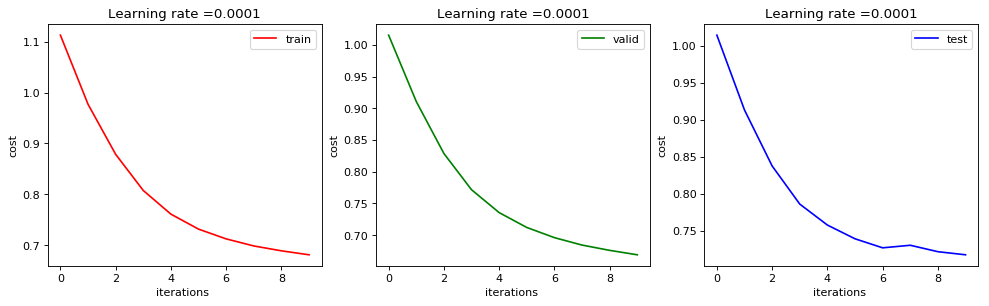

Parameters have been trained!
Train Accuracy: 0.608876
Valid Accuracy: 0.605192
Test Accuracy: 0.540765


In [26]:
# parameters = model(np.dot(u.T, train_features_norm), train_labels, 
#                    np.dot(u.T, valid_features_norm), valid_labels,
#                    np.dot(u.T, test_features_norm), test_labels, 
#                    train_w, valid_w, test_w,
#                    minibatch_size = 256, \
#                    num_epochs = 153, \
#                    learning_rate = 0.0001,\
#                    regular = 0.02, isTest = True, drop_val = 0.9)
parameters = model(train_features_norm, train_labels, 
                   valid_features_norm, valid_labels,
                   test_features_norm, test_labels, 
                   train_w, valid_w, test_w,
                   minibatch_size = 128, \
                   num_epochs = 10, \
                   learning_rate = 0.0001,\
                   regular = 0.006, isTest = True, drop_val = 0.8)

In [30]:
valid_labels

array([[ 0.,  0.,  1., ...,  1.,  0.,  0.]])

In [66]:
np.std(train_features_norm)

1.0044435424604434

In [198]:
print(train_w.shape, valid_w.shape, test_w.shape)

(1, 168311) (1, 57158) (1, 58633)


In [199]:
valid_features_norm.shape

(89, 57158)

In [27]:
# outnumpy2 = compute_test(np.dot(u.T, output_features_norm), parameters)
outnumpy2 = compute_test(output_features_norm, parameters[0])
outnumpy2 = outnumpy2.T
outputDf2 = pd.DataFrame()
features_id2 = outputDf_raw[outputDf_raw.columns[0]]
outputDf2['id'] = features_id2
outputDf2['proba'] = 0
outputDf2.loc[:,'proba'] = outnumpy2
outputDf2.set_index('id', inplace = True)

In [28]:
print(np.max(outnumpy2), np.min(outnumpy2))

1.0 0.0418689


In [29]:
outputDf2.to_csv('output3.csv')
print('done')

done


In [17]:
print('{%0.2f},%d'%(10.5,10.5))

{10.50},10


In [213]:
with open('parameters.pickle', 'wb') as f:
    pickle.dump(parameters, f, protocol = pickle.HIGHEST_PROTOCOL)

In [214]:
with open('parameters.pickle', 'rb') as f:
    p2 = pickle.load(f)

In [17]:
parameters

{'W1': array([[-0.08864467, -0.02340704, -0.07046138, ...,  0.01135703,
          0.01369897,  0.00776726],
        [-0.00358669, -0.06034357,  0.03968098, ..., -0.00820385,
         -0.01032376, -0.02793537],
        [ 0.07788593,  0.04262615,  0.01623319, ..., -0.00895158,
         -0.01315631,  0.00922   ],
        ..., 
        [-0.07688304, -0.01859355, -0.07311361, ...,  0.01361417,
          0.01576041,  0.00847022],
        [-0.02545647,  0.0492979 ,  0.07049087, ..., -0.02407114,
         -0.0208289 , -0.02716064],
        [ 0.0251217 ,  0.03444632,  0.11249846, ...,  0.00727443,
          0.00272256,  0.04090313]], dtype=float32),
 'W2': array([[ -6.76223729e-03,   5.68279400e-02,  -4.87840921e-02, ...,
           8.02939106e-03,   5.98202720e-02,  -1.61622819e-02],
        [  1.26587907e-02,  -1.50935911e-02,   1.22053502e-02, ...,
           1.57744754e-02,  -1.03374403e-02,   2.77124979e-02],
        [ -7.32470397e-03,   2.68283132e-02,  -1.63147412e-02, ...,
          -1.

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.pooling import MaxPooling1D
from keras.layers.pooling import GlobalAveragePooling1D

from keras import backend as K
from keras import initializers
from keras import regularizers
from keras import losses
from keras import optimizers
from keras.callbacks import TensorBoard as tb
from keras.layers.normalization import BatchNormalization
from matplotlib import pyplot as plt

%matplotlib inline

In [ ]:
model2 = Sequential([
    Conv1D(filters = 3, 
           kernel_size = 3, 
           activation = 'relu', 
           padding = 'same',
           kernel_initializer = initializers.he_normal(),
           input_shape = (train_features.shape[1], 1), 
           use_bias=False),
    Conv1D(filters = 3, 
           kernel_size = 3, 
           activation = 'relu', 
           padding = 'same', 
           kernel_initializer = initializers.he_normal(),
           use_bias=False),
    MaxPooling1D(pool_size = 3, strides = 1),
    Conv1D(filters = 3, 
           kernel_size = 3, 
           activation = 'relu', 
           padding = 'same', 
           kernel_initializer = initializers.he_normal(),
           use_bias=False),
    Conv1D(filters = 3, 
           kernel_size = 3, 
           activation = 'relu', 
           padding = 'same', 
           kernel_initializer = initializers.he_normal(),
           use_bias=False),
    MaxPooling1D(pool_size = 3, strides = 2),
    Flatten(),
    Dense(12, activation='relu', use_bias=False),
    Dense(1, activation='sigmoid', use_bias=False)
])

model2.compile(
    loss = losses.binary_crossentropy, 
    optimizer = optimizers.Adam(lr = 0.005),
    metrics = ['accuracy']
)

print('model2 has been construct!')

In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [30]:
x = (np.random.randn(1000)*10 + 10)
y = (x + np.random.randn(1000)*5)

x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

In [31]:
y.shape

(1000, 1)

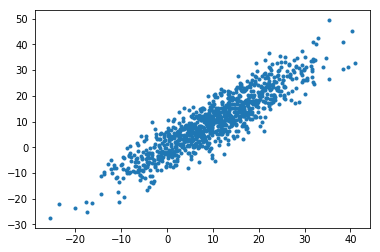

In [32]:
plt.plot(x,y, '.')

plt.show()

In [63]:
def pca_numpy(X, k):
    m, n = np.shape(X)
    X -= np.mean(X, axis = 0)
    cov = 1/m * X.T.dot(X)
    U, S, V = np.linalg.svd(cov)
    print(U.shape)
    X_reduce = X.dot(U[:, :k])
    return X_reduce

def whitening_numpy(X):
    m, n = np.shape(X)
    X -= np.mean(X, axis = 0)
    cov = 1/m * X.T.dot(X)
    U, S, V = np.linalg.svd(cov)
    X_rot = X.dot(U)
    X_white = X_rot / np.sqrt(S + 1e-5)
    return X_rot, X_white

In [64]:
X = np.hstack((x, y))

(2, 2)


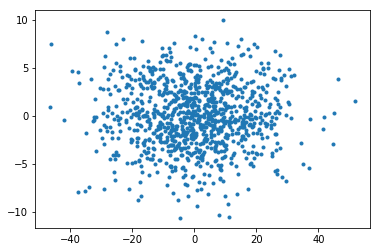

In [65]:
pcaX = pca_numpy(X, 2)
plt.plot(pcaX[:, 0], pcaX[:, 1], '.')
plt.show()

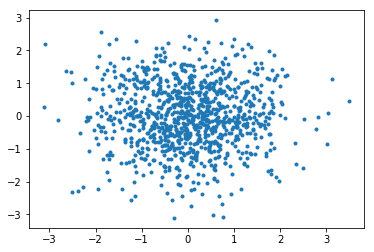

In [69]:
_, whiteX = whitening_numpy(X)
plt.plot(whiteX[:, 0], whiteX[:, 1], '.')
plt.show()

In [77]:
np.mean(np.random.randn(10, 10).reshape(-1, 1) / )

0.048095432604530197